# Scalers in Preprocessing
The **sklearn.preprocessing** module includes 
1. scaling
2. centering
3. normalization : Normalize samples individually to unit norm.
4. binarization : set feature values to 0 or 1 according to a threshold
5. imputation methods : dealing with missing values

This workbook deals with the scaling. There are different scalers at work in Python :
a. StandardScaler
b. MinMaxScaler
c. RobustScaler

## Standard Scaler

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
df = pd.read_excel('../../Data/non_scaled_data.xlsx')

The goal is to find a regression $y = w_1 \times a + w_2 \times b + w_3 \times c + w_0$<br>
The inputs are (at a first glance, normaly distributed) which allows us to the standard scaler where<br>
$(a_i,b_i,c_i) \rightarrow (\hat{a}_i,\hat{b}_i,\hat{c}_i)$
<br>
with
<br>
$\hat{a}_i = \frac{a_i-\overline{a}}{\sigma_a}$

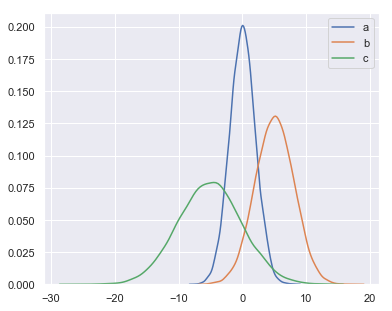

In [28]:
fig, a = plt.subplots(1,1, figsize=(6, 5))
sns.kdeplot(df['a'])
sns.kdeplot(df['b'])
sns.kdeplot(df['c']);


## Using Unscaled Data
Using a linear regression

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
ols= LinearRegression(fit_intercept=True)
ols.fit(df.loc[:,['a','b','c']].values,df['y'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
print('Coefficients',np.round(ols.coef_,3))
print('Intercept (w0)',np.round(ols.intercept_,3))


Coefficients [ 2.002  5.001 23.999]
Intercept (w0) 6.492


## Using Scaled Data

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.loc[:,['a','b','c']].values
Y = df['y'].values
X_scaled = scaler.fit_transform(X)
scaled_df = pd.DataFrame(X_scaled, columns=['x1', 'x2', 'x3'])

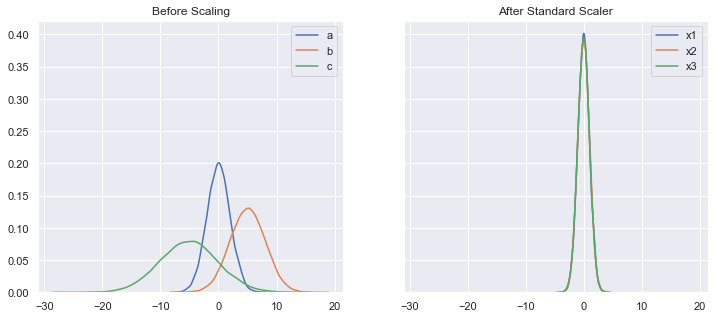

In [38]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5),sharey=True,sharex=True)

ax1.set_title('Before Scaling')
sns.kdeplot(df['a'], ax=ax1)
sns.kdeplot(df['b'], ax=ax1)
sns.kdeplot(df['c'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2);

In [39]:
ols_scaled= LinearRegression(fit_intercept=True)
ols_scaled.fit(X_scaled,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
print('The coefficients are of course very different')
print('Coefficients',np.round(ols_scaled.coef_,3))
print('Intercept (w0)',np.round(ols_scaled.intercept_,3))

The coefficients are of course very different
Coefficients [  4.     15.02  119.509]
Intercept (w0) -90.07


## Forecasting

Imagine the following inputs :<br>
$(a,b,c)=(5,10,10)$
The prediction with the unscaled data :

In [47]:
print('Prediction:',ols.predict(np.matrix([5,10,10]))[0])

Prediction: 306.501480455628


In [55]:
print('Transformed Data:')
x_transformed = scaler.transform(np.matrix([5,10,10]))
print(x_transformed[0,:])

Transformed Data:
[2.49325454 1.65526269 3.02686509]


In [57]:
print('Prediction (with scaled data):',ols_scaled.predict(x_transformed)[0])

Prediction (with scaled data): 306.50148045562815


# MinMax Scaler

The **MinMaxScaler** is a popular scaling algorithm, and follows the following formula for each feature:
<br>
$\frac{xi–min(x)}{max(x)–min(x)}$<br>
It essentially shrinks the range such that the range is now between 0 and 1.
This scaler works better for cases in which the standard scaler might not work so well. If the distribution is not Gaussian or the standard deviation is very small, the min-max scaler works better. 



In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = df.loc[:,['a','b','c']].values
Y = df['y'].values
X_scaled = scaler.fit_transform(X)
scaled_df = pd.DataFrame(X_scaled, columns=['x1', 'x2', 'x3'])

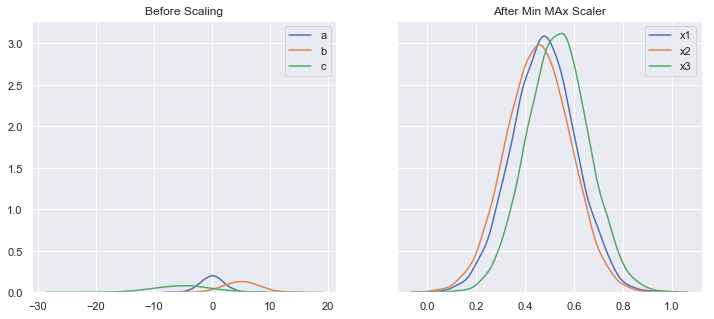

In [59]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5),sharey=True)

ax1.set_title('Before Scaling')
sns.kdeplot(df['a'], ax=ax1)
sns.kdeplot(df['b'], ax=ax1)
sns.kdeplot(df['c'], ax=ax1)
ax2.set_title('After Min MAx Scaler')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2);

# Robust Scaler

The **RobustScaler** uses a similar method to the Min-Max scaler but it instead uses the **interquartile** range, rathar than the min-max, so that it is robust to outliers. Therefore it follows the formula:
<br>
$\frac{xi–Q1(x)}{Q3(x)–Q1(x)}$
<br>
Where $Q1$ is the first quantile and $Q3$ is the third  quantile

In [60]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X = df.loc[:,['a','b','c']].values
Y = df['y'].values
X_scaled = scaler.fit_transform(X)
scaled_df = pd.DataFrame(X_scaled, columns=['x1', 'x2', 'x3'])

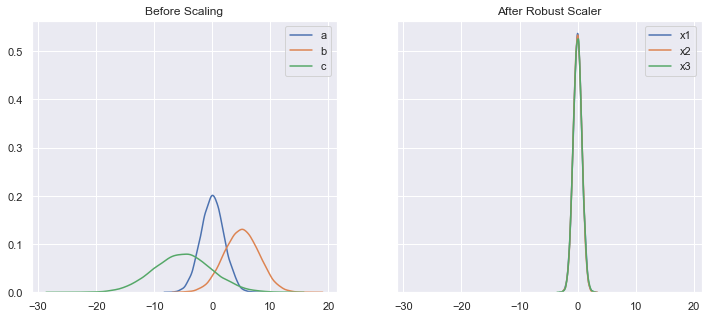

In [62]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5),sharey=True,sharex=True)

ax1.set_title('Before Scaling')
sns.kdeplot(df['a'], ax=ax1)
sns.kdeplot(df['b'], ax=ax1)
sns.kdeplot(df['c'], ax=ax1)
ax2.set_title('After Robust Scaler')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2);